# 2020년 빅데이터개론2 과제 5

**제출기한 : 2022년 11월 21일 23시 59분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.

In [1]:
import pandas as pd
import numpy as np
import io
import math
from itertools import product, combinations

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2_2022F_과제-01-홍길동-12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



## 1. 코로나 환자 자료


우리는 이 과제에서 2020년 1월 20일 부터 2022년 9월 5일까지(총 960일) 연령대 별로 일별 코로자 확진자의 수를 포함하고 있는 자료를 이용할 것이다.

- 외부 화일(`corona_age.csv`)로부터 읽어들여 분석을 할 수 있는 데이터프레임 령식의 자료로 만든다.

코로나 환자 자료 문제의 목적은 다음과 같은 질문에 대한 답을 주는 것이다.

- 연령대 별 확진자의 960일 동안 총합은?
- 960일동안 일별 확진자 수의 평균은?
- 연도별, 월별 확진자의 수는?

일단, 자료 화일 `corona_age.csv` 를 `MS 엑셀` 로 보면 여러분들은 다음과 같은 사실을 알 수 있다.

- 숫자 천 단위에 쉼표(`,`)가 있는 숫자와 쉼표가 없는 숫자가 섞여있다.
- 확진자가 없는 자료, 즉 값이 0인 자료는 0 또는 `-` 으로 표시되어 있거나 또는 빈칸(결측값 `NaN` 으로 입력된다)으로 되어있는 것을 알 수 있다.

이러한 자료를 데이터프레임으로 만들면 자료의 형식이 숫자가 아니라 `object` 로 만들어 진다. 이러한 `object` 형식은 실제로 문자열과 동일한 형식이기 때문에 숫자에 대한 연산을  적용할 수 없다. 

- 다음 일련의 코드는 자료를 외부화일에서 입력하여 분석이 가능한 자료의 형식을 가지는 데이터 프레임으로 만들어 주는 작업을 설명한 것이다. 아래 (1)- (6) 에 제시된 코드는 여러분이 직접 실행해 보면서 공부하세요. 

- (1)- (6) 에 제시된 코드 후에 과제 3문제가 있습니다.


**(1) 자료를 외부 `CSV` 화일에서 불러오기**


- 다음의 셀에 있는 명령문을 수행하면 [화일선택] 버튼이 나타난다.
- 여러분의 컴퓨터에 저장된 외부 화일(`corona_age.csv`)에 있는 위치를 선택하면 자료를 불러올 수 있다. 

주의할 점은 `colab` 을 종료하고 다시 노트북을 실행시킬 때마다 다시 자료를 입력해야 한다.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving corona_age.csv to corona_age.csv


`CSV` 화일을 불러오는 명령어가 오류없이 실행되었다면 다음과 같은 코드로 코오나 확진자 자료가 데이터프레임 `df1` 에 저장한다.  

In [3]:
df1 = pd.read_csv(io.BytesIO(uploaded['corona_age.csv']) ,encoding='cp949')

In [4]:
df1

,일자,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,2020-01-20,-,-,-,1,-,-,-,-,-
1,2020-01-21,-,-,-,-,-,-,-,-,-
2,2020-01-22,-,-,-,-,-,-,-,-,-
3,2020-01-23,-,-,-,-,-,-,-,-,-
4,2020-01-24,-,-,-,-,-,1,-,-,-
...,...,...,...,...,...,...,...,...,...,...
955,2022-09-01,"6,076","8,764",10918,"11,504",12426,"11,814",10582,"5,966","3,516"
956,2022-09-02,"9,126","12,339",11500,"11,373",12541,"11,756",11055,"6,241",3655
957,2022-09-03,"7,176","10,768",9577,"10,013",11099,"10,997",10482,"6,177",3457
958,2022-09-04,"6,691","9,128",8099,"8,968",10374,"10,111",9754,"5,709",3310


**(2) 문자 `-` 를 모두 문자 `0`으로 바꾸기**


데이터프레임 `df1` 은  확진자가 없는 경우를 문자 `-` 로 표시한 셀들이 많다. 

- 데이터프레임에 적용하는 메소드 `replace(old,new)` 를 이용한다.
- 셀의 자료가 `old` 와 **정확하게** 일치하면 `new` 로 바꾸어 준다. 


In [5]:
df2 = df1.replace('-','0')
df2

,일자,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,2020-01-20,0,0,0,1,0,0,0,0,0
1,2020-01-21,0,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0
4,2020-01-24,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
955,2022-09-01,"6,076","8,764",10918,"11,504",12426,"11,814",10582,"5,966","3,516"
956,2022-09-02,"9,126","12,339",11500,"11,373",12541,"11,756",11055,"6,241",3655
957,2022-09-03,"7,176","10,768",9577,"10,013",11099,"10,997",10482,"6,177",3457
958,2022-09-04,"6,691","9,128",8099,"8,968",10374,"10,111",9754,"5,709",3310


**(3) 결측값(`NaN`)을 문자 `0` 으로 바꾸기** 


- 이제 전체 자료에 결측값이 있는지 알아보자. 데이터프레임에 메소드 `isnull()` 을 적용하면 각 셀이 결측값인지를 `True` 와 `False` 로 알려준다. 

- 연속으로 두 개의 메소드 `isnull().sum()` 을 적용하면 각 열에 결측값이 몇 개 있는 지 알려준다.

In [6]:
df2.isnull()

,일자,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False,False,False,False


In [7]:
df2.isnull().sum()

일자        0
0-9세      0
10-19세    0
20-29세    0
30-39세    0
40-49세    0
50-59세    0
60-69세    0
70-79세    0
80세이상     1
dtype: int64

위의 결과를 보면 `80세이상` 열에 1개의 결측값이 있는 것을 알 수 있다.  다음과 같이 보면 `df_2[530, "80세이상"]` 의 값이 `NaN`으로 결측값이다.

In [8]:
df2.loc[530, "80세이상"]

nan

이 경우 1개의 결측값만 0으로 바꾸어 줄 수도 있지만 일반적으로 자료에는 여러 개의 결측값이 있을  수 있다.

- 데이터프레임의 `fillna(value)` 메소드는 데이터프레임의 결측값을 모두 `value` 로 바꾸어 주는 기능을 한다.

- 아래와 같이 데이터프레임 `df3` 에는 이제 결측값이 없다.

In [9]:
df3 = df2.fillna(0)

In [10]:
df3.loc[530, "80세이상"]

0

In [11]:
df3.isnull().sum()

일자        0
0-9세      0
10-19세    0
20-29세    0
30-39세    0
40-49세    0
50-59세    0
60-69세    0
70-79세    0
80세이상     0
dtype: int64

In [12]:
df3

,일자,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,2020-01-20,0,0,0,1,0,0,0,0,0
1,2020-01-21,0,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0
4,2020-01-24,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
955,2022-09-01,"6,076","8,764",10918,"11,504",12426,"11,814",10582,"5,966","3,516"
956,2022-09-02,"9,126","12,339",11500,"11,373",12541,"11,756",11055,"6,241",3655
957,2022-09-03,"7,176","10,768",9577,"10,013",11099,"10,997",10482,"6,177",3457
958,2022-09-04,"6,691","9,128",8099,"8,968",10374,"10,111",9754,"5,709",3310


**(4) 쉼표를 포함하는 숫자로 구성된 문자열에서 쉼표 없애기**


이제 쉼표를 포함하는 숫자로 구성된 문자열에서 쉼표 없애보자.

```
'6,076' ->> '6076'
```

이러한 작업을 하기 위하여 앞에서 데이터프레임에 적용되는 메소드 `replace(old,new)` 를 적용하는데 문제가 있다. 

- **데이터프레임에 적용되는** 메소드 `replace(old,new)` 는 셀의 내용이 정확하게 `old` 와 일치하는 경우만 `new` 로 바꾸어 준다. 따라서 쉼표를 포함한 숫자의 형태가 너무 다양하기 때문에 적용할 수가 없다.

- 하지만 **문자열에 적용되는** 메소드 `replace(old,new)` 는 문자열의 각 문자를 모두 찾아 바꾸어 줄 수 있다. 

다음에 예제에서 같은 메소드 `replace(old,new)` 가 적용되는 대상에 달라지면 기능과 결과가 다른 것을 알  수 있다.


In [13]:
ex1 = pd.DataFrame({"0-9세": ["6,076",	"8,764"], "10-19세":["10918","11,504"]})
ex1

,0-9세,10-19세
0,"6,076",10918
1,"8,764","11,504"


In [14]:
ex1.replace(",", "")

,0-9세,10-19세
0,"6,076",10918
1,"8,764","11,504"


In [15]:
ex1.replace("6,076", "6076")

,0-9세,10-19세
0,6076,10918
1,"8,764","11,504"


In [16]:
ex1.iloc[0,0]

'6,076'

In [17]:
ex1.iloc[0,0].replace(",","")

'6076'

이제 문자열을 인자로 받아서 쉼표 `,` 를 공백이 없는 문자(`""`)로 바꾸어 주는 함수 `replace_comma2null` 를 다음과 같이 정의하자.

- 아래에서 `isinstance(s, str)`는 `s` 가 문자열이면 `True`가 된다.

In [18]:
def replace_comma2null(s):
  if isinstance(s, str):
    res = s.replace("," ,"")
  else:
    res = s
    
  return res

In [19]:
replace_comma2null(ex1.iloc[0,0])

'6076'

이제 우리가 배운 `applymap` 메소드를 이용하여 함수 `replace_comma2null`를  데이터프레임의 모든 셀에 적용해 보자. 

In [20]:
df4 = df3.applymap(replace_comma2null)
df4

,일자,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,2020-01-20,0,0,0,1,0,0,0,0,0
1,2020-01-21,0,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0
4,2020-01-24,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
955,2022-09-01,6076,8764,10918,11504,12426,11814,10582,5966,3516
956,2022-09-02,9126,12339,11500,11373,12541,11756,11055,6241,3655
957,2022-09-03,7176,10768,9577,10013,11099,10997,10482,6177,3457
958,2022-09-04,6691,9128,8099,8968,10374,10111,9754,5709,3310


In [21]:
df4.dtypes

일자        object
0-9세      object
10-19세    object
20-29세    object
30-39세    object
40-49세    object
50-59세    object
60-69세    object
70-79세    object
80세이상     object
dtype: object

**(5) 문자열로 저정된 숫자를 정수 형식 `int` 로 바꾸기**

이제 마지막으로 문자열로 저정된 숫자를 정수 형식 `int` 로 바꾸어 보자. 

- 함수 `int(str)`는 문자열로 표시된 숫자를 정수형으로 바꾸어 주는 함수이다. 
- 한 가지 주의할 점은 `날짜` 열에는 문자열을 숫자로 바꾸는 함수를 적용하지 않는다. `iloc` 메소드를 사용해서 숫자의 열만 선택하여 숫자로 바꾸어 준다.



In [22]:
int('1234')

1234

In [23]:
df5 = df4.iloc[:,1:10].applymap(int)
df5

,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
955,6076,8764,10918,11504,12426,11814,10582,5966,3516
956,9126,12339,11500,11373,12541,11756,11055,6241,3655
957,7176,10768,9577,10013,11099,10997,10482,6177,3457
958,6691,9128,8099,8968,10374,10111,9754,5709,3310


In [24]:
df5.dtypes

0-9세      int64
10-19세    int64
20-29세    int64
30-39세    int64
40-49세    int64
50-59세    int64
60-69세    int64
70-79세    int64
80세이상     int64
dtype: object

**(6) 날짜 형식을 가진 날짜와 달의 열을 생성**

- 이제 원래 자료에서 문자로 된 `일자` 컬럼의 형식을 날짜 형식으로 만들어 주고 월별 분석을 위하여 
`월` 컬럼을 만들어 주자.

- `pd.to_datetime( series, format)` 함수는 문자가 `format`으로 표시되어 있는 시리즈(Series)를  날짜 형식을 가지는 시리즈 자료로 만들어 준다.

  + 문자열이 `2020-12-01` 로 표시된 `format` 은 `%Y-%m-%d` 로 나타낸다.
  + 다양한 날짜 형식에 대한 문법은 [여기](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)를 참조하자. 

-  `dt.month` 는 날짜 형식을 가지는 시리즈 자료에서 월(month) 를 출력하는 메소드이다.


In [25]:
df5['일자'] = pd.to_datetime(df4['일자'], format='%Y-%m-%d')
df5['월'] = df5['일자'].dt.month

In [26]:
df5

,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상,일자,월
0,0,0,0,1,0,0,0,0,0,2020-01-20,1
1,0,0,0,0,0,0,0,0,0,2020-01-21,1
2,0,0,0,0,0,0,0,0,0,2020-01-22,1
3,0,0,0,0,0,0,0,0,0,2020-01-23,1
4,0,0,0,0,0,1,0,0,0,2020-01-24,1
...,...,...,...,...,...,...,...,...,...,...,...
955,6076,8764,10918,11504,12426,11814,10582,5966,3516,2022-09-01,9
956,9126,12339,11500,11373,12541,11756,11055,6241,3655,2022-09-02,9
957,7176,10768,9577,10013,11099,10997,10482,6177,3457,2022-09-03,9
958,6691,9128,8099,8968,10374,10111,9754,5709,3310,2022-09-04,9


In [27]:
df5.dtypes

0-9세               int64
10-19세             int64
20-29세             int64
30-39세             int64
40-49세             int64
50-59세             int64
60-69세             int64
70-79세             int64
80세이상              int64
일자        datetime64[ns]
월                  int64
dtype: object

이제 최종적인 자료를 데이터프레임 `final` 에 저장하자.
- 아레 코드에서 열의 순서를 바꾸어 `일자` 와 `월` 을 앞으로 배치하였다. 

In [28]:
cols = list(df5.columns)
cols_new = cols[-2:] + cols[0:9]

final = df5[cols_new]
final

,일자,월,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80세이상
0,2020-01-20,1,0,0,0,1,0,0,0,0,0
1,2020-01-21,1,0,0,0,0,0,0,0,0,0
2,2020-01-22,1,0,0,0,0,0,0,0,0,0
3,2020-01-23,1,0,0,0,0,0,0,0,0,0
4,2020-01-24,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
955,2022-09-01,9,6076,8764,10918,11504,12426,11814,10582,5966,3516
956,2022-09-02,9,9126,12339,11500,11373,12541,11756,11055,6241,3655
957,2022-09-03,9,7176,10768,9577,10013,11099,10997,10482,6177,3457
958,2022-09-04,9,6691,9128,8099,8968,10374,10111,9754,5709,3310


**문제 1**

위에서 만든 데이터프레임 `final` 을 이용하여 **960일 동안 발생한 총 코로니 확진자수를  각 연령대 별로** 구하는 코드를 작성히시오.

In [29]:
final.iloc[:,2:].sum(axis = 0).to_frame(name = "총 확진자 수")

,총 확진자 수
0-9세,2650651
10-19세,3023067
20-29세,3511590
30-39세,3460136
40-49세,3610057
50-59세,2993501
60-69세,2450628
70-79세,1199042
80세이상,708068


**문제 2**

위에서 만든 데이터프레임 `final` 을 이용하여 **일별 총 확진자수**를 구하고 평균, 표준편차, 중앙값, 최대값을 구하는 코드를 작성하시오.  

In [30]:
day_corona = final.iloc[:,2:11].sum(axis=1).to_frame(name = "총 확진자 수").set_index(final["일자"])
day_corona

,총 확진자 수
일자,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1
...,...
2022-09-01,81566
2022-09-02,89586
2022-09-03,79746


In [31]:
day_corona.describe().iloc[[1,2,5,7],].rename(columns = {"총 확진자 수":"일별 확진자 수"})

,일별 확진자 수
mean,24590.354167
std,68483.978082
50%,678.000000
max,621142.000000


**문제 3**

위에서 만든 데이터프레임 `final` 을 이용하여 **연도별, 월별, 총 확진자수**를 구하는 코드를 작성하시오.  

Hint: 날짜 형식의 자료에서 연도응 구하는 메소드는 `dt.year` 이다.

In [32]:
df5['일자'].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
955    2022
956    2022
957    2022
958    2022
959    2022
Name: 일자, Length: 960, dtype: int64

In [33]:
final.drop(columns = ['월']).groupby(by = [final['일자'].dt.year, final['일자'].dt.month]).sum().sum(axis = 1).to_frame(name = '총 확진자 수')

총 확진자 수
일자   일자         
2020 1        11
     2      2920
     3      6855
     4       979
     5       703
     6      1331
     7      1506
     8      5641
     9      3865
     10     2700
     11     7688
     12    26527
2021 1     17471
     2     11467
     3     13414
     4     18927
     5     18331
     6     16623
     7     41374
     8     53077
     9     59857
     10    53415
     11    82517
     12   183593
2022 1    214815
     2   2288480
     3   9960484
     4   4142577
     5    866069
     6    255823
     7   1416522
     8   3470588
     9    360590

## 2. 표본 평균의 분포 - 단순임의 추출

전체 8명인 학생들의 모임이 있다. 모임에는 여자 학생과 남자 학생이 각각 4명씩 있다. 우리가 알고 싶은 모수는 전체 8명의 키에 대한 평균(mean)이다. 

 다음은 8명의 학생들의 성별(`sex`)과 키(`height`)를 포함하는 데이터프레임 `pop`이다.  


In [34]:
pop = pd.DataFrame({'sex': ["F","F","F","F","M","M","M","M"], 'height':[156, 153, 164, 172, 178, 187, 169, 191]})
pop

,sex,height
0,F,156
1,F,153
2,F,164
3,F,172
4,M,178
5,M,187
6,M,169
7,M,191


모집단에 대한 요약통계량과 키의 분포는 다음과 같다.

In [35]:
pop.describe()

,height
count,8.000000
mean,171.250000
std,13.666957
min,153.000000
25%,162.000000
50%,170.500000
75%,180.250000
max,191.000000


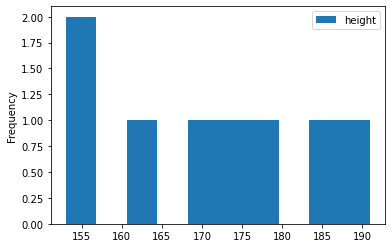

In [36]:
pop.plot.hist()

**문제 1**

데이터프레임에서 4명의 학생을 임의추출하여 데이터프레임 `sam_df`에 저장하는 파이썬 코드를 작성하시오.

주의: 

1. 표본을 여러 번 추출하는 것이 아니고 1번 추출하는 것입니다. 
2. 비복원 추출을 사용합니다. 

In [37]:
sam_df = pop.sample(n = 4, replace = False, random_state = 1)
sam_df

,sex,height
7,M,191
2,F,164
1,F,153
6,M,169


**문제 2** 

표본으로 추출된 데이터프레임 `sam_df`에서 열 `height` 만 선택하여  `height_selected` 에 저장하는 파이썬 코드를 작성하시오.   이 때 `height_selected`의 자료 형식은 `numpy` 의 행렬(array)형식으로 지정하시오.

힌트: `numpy` 의 행렬(array)형식으로 지정하는 함수는 `np.array()` 입니다.

In [38]:
height_selected = np.array(sam_df['height'])
height_selected

array([191, 164, 153, 169])

**문제 3** 

위 문제 2에서 추출된 4명의 키에 대한 표본 평균을 계산하는 파이썬 코드를 작성하시오.

In [39]:
sum(height_selected)/len(height_selected)

169.25

**문제 4**

이제 8명 학생에서 4명을 임의로 추출할 때 모든 가능한 표본을 가진 리스트 `all_possible_samples`를 만드는 파이썬 코드를 작성하시오.


In [40]:
all_possible_samples = []
sample_size = 4

for i in combinations(np.array(pop['height']), sample_size):
  all_possible_samples.append(i)

all_possible_samples

[(156, 153, 164, 172),
 (156, 153, 164, 178),
 (156, 153, 164, 187),
 (156, 153, 164, 169),
 (156, 153, 164, 191),
 (156, 153, 172, 178),
 (156, 153, 172, 187),
 (156, 153, 172, 169),
 (156, 153, 172, 191),
 (156, 153, 178, 187),
 (156, 153, 178, 169),
 (156, 153, 178, 191),
 (156, 153, 187, 169),
 (156, 153, 187, 191),
 (156, 153, 169, 191),
 (156, 164, 172, 178),
 (156, 164, 172, 187),
 (156, 164, 172, 169),
 (156, 164, 172, 191),
 (156, 164, 178, 187),
 (156, 164, 178, 169),
 (156, 164, 178, 191),
 (156, 164, 187, 169),
 (156, 164, 187, 191),
 (156, 164, 169, 191),
 (156, 172, 178, 187),
 (156, 172, 178, 169),
 (156, 172, 178, 191),
 (156, 172, 187, 169),
 (156, 172, 187, 191),
 (156, 172, 169, 191),
 (156, 178, 187, 169),
 (156, 178, 187, 191),
 (156, 178, 169, 191),
 (156, 187, 169, 191),
 (153, 164, 172, 178),
 (153, 164, 172, 187),
 (153, 164, 172, 169),
 (153, 164, 172, 191),
 (153, 164, 178, 187),
 (153, 164, 178, 169),
 (153, 164, 178, 191),
 (153, 164, 187, 169),
 (153, 164,

**문제 5**

문제 4에서 구한 모든 가능한 표본의 개수를 `all_possible_num` 저장하는 파이썬 코드를 작성하시오.

In [41]:
all_possible_num = len(all_possible_samples)
all_possible_num

70

**문제 6**

문제 4에서 구한 모든 가능한 표본들을 가진 리스트 `all_possible_samples` 에서 각 표본에 대한 평균을 계산하여  데이터프레임 `sample_mean_df` 저장하는 파이썬 코드를 작성하시오.  

Hint: `numpy` 에서 평균을 구하는 함수는 `np.mean()` 이다.

주의: 데이터프레임 `sample_mean_df`는 1개의 열을 가지고 있으며 열이름은 `sample_mean`이다.


In [42]:
sample_mean_list = []

for i in all_possible_samples:
   sample_mean_list.append(np.mean(i))

sample_mean_df = pd.DataFrame({'sample_mean' : sample_mean_list})
sample_mean_df

,sample_mean
0,161.25
1,162.75
2,165.00
3,160.50
4,166.00
...,...
65,176.50
66,182.00
67,177.50
68,179.75


**문제 7**

위의 문제 6 에서 만든 데이터프레임 `sample_mean_df` 에 저장된 표본 평균들의 요약통계량을 구하는 파이썬 코드를 작성시오 

In [43]:
sample_mean_df.describe()

,sample_mean
count,70.000000
mean,171.250000
std,4.866888
min,160.500000
25%,168.000000
50%,171.250000
75%,174.500000
max,182.000000


**문제 8**

위의 문제 6 에서 만든 데이터프레임 `sample_mean_df` 에 저장된 표본 평균들의 히스토그램을 그리는 파이썬 코드를 작성시오.

히스토그램의 모양은 표본 평균의 분포를 나타낸다. 

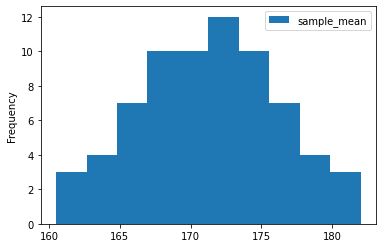

In [44]:
sample_mean_df.plot.hist()